# TensorBoard

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
# ignore warnings in output cell
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


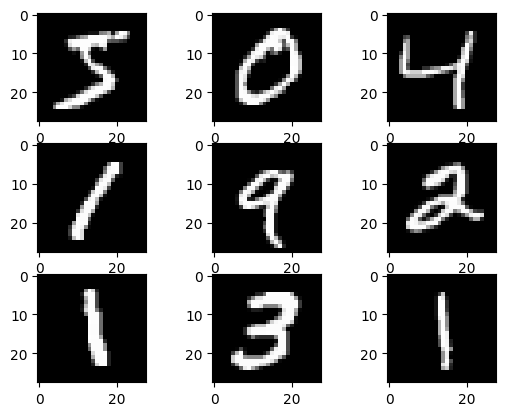

In [2]:
#load the minist dataset
mnist = tf.keras.datasets.mnist

# split the data into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the data    
x_train, x_test = x_train / 255.0, x_test / 255.0

# plot the first 9 images
for i in range(9):
    plt.subplot(330+ 1+ i)
    plt.imshow(x_train[i], cmap='gray')

    
plt.show()

In [3]:
# create the model using convolutional layers, max pooling and dense layers
model = Sequential([
    tf.keras.layers.Conv2D(10,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(10,(3,3), activation='relu'),
    tf.keras.layers.Conv2D(10,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)), # modify the pool size to (1,1) to get a single value for each image
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

Epoch 1/5
1875/1875 [==============================] - 23s 11ms/step - loss: 0.7361 - accuracy: 0.7462 - val_loss: 0.1756 - val_accuracy: 0.9485
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3779 - accuracy: 0.8728 - val_loss: 0.1272 - val_accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3212 - accuracy: 0.8914 - val_loss: 0.1037 - val_accuracy: 0.9691
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2916 - accuracy: 0.9026 - val_loss: 0.0941 - val_accuracy: 0.9726
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9760
Test Loss: 0.08081582188606262
Test Accuracy: 0.9760000109672546


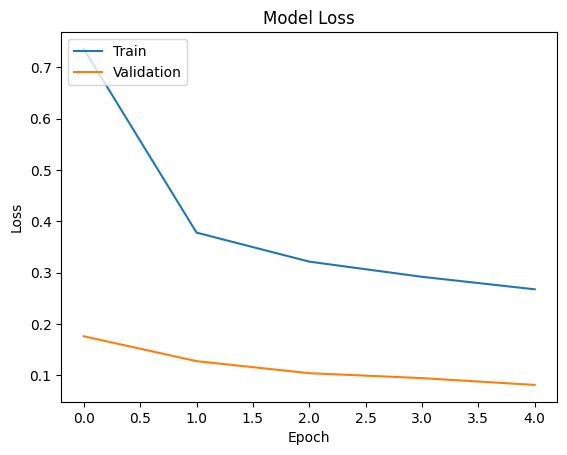

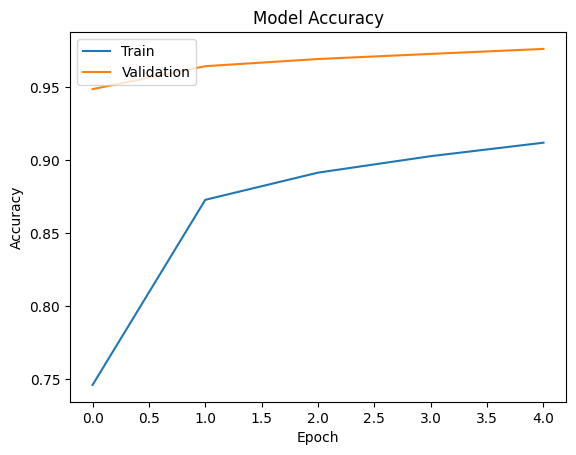

In [4]:
#compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, epochs=5,
                    batch_size=32,
                    validation_data=(x_test, y_test))

# evalute the model
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [5]:
# create the model using convolutional layers, max pooling and dense layers
model = Sequential([
    tf.keras.layers.Conv2D(10,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(10,(3,3), activation='relu'),
    tf.keras.layers.Conv2D(10,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)), # modify the pool size to (1,1) to get a single value for each image
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

#compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [6]:
# # clear the logs from previous run
# !rm -rf ./logs

In [7]:
# create the tensorboard callback
tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)

In [8]:
# train the model
history = model.fit(x_train, y_train, 
                    epochs=5, 
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback])


Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7606 - accuracy: 0.7343 - val_loss: 0.2151 - val_accuracy: 0.9446
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4187 - accuracy: 0.8559 - val_loss: 0.1459 - val_accuracy: 0.9600
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3456 - accuracy: 0.8833 - val_loss: 0.1169 - val_accuracy: 0.9648
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3100 - accuracy: 0.8961 - val_loss: 0.1068 - val_accuracy: 0.9695
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2845 - accuracy: 0.9034 - val_loss: 0.1049 - val_accuracy: 0.9698


In [10]:
# Load and active tensorboard
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
# run inline tensorboard
%tensorboard --logdir=./logs

Reusing TensorBoard on port 6006 (pid 23996), started 0:03:27 ago. (Use '!kill 23996' to kill it.)